# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача проекта — определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение файла с данными

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

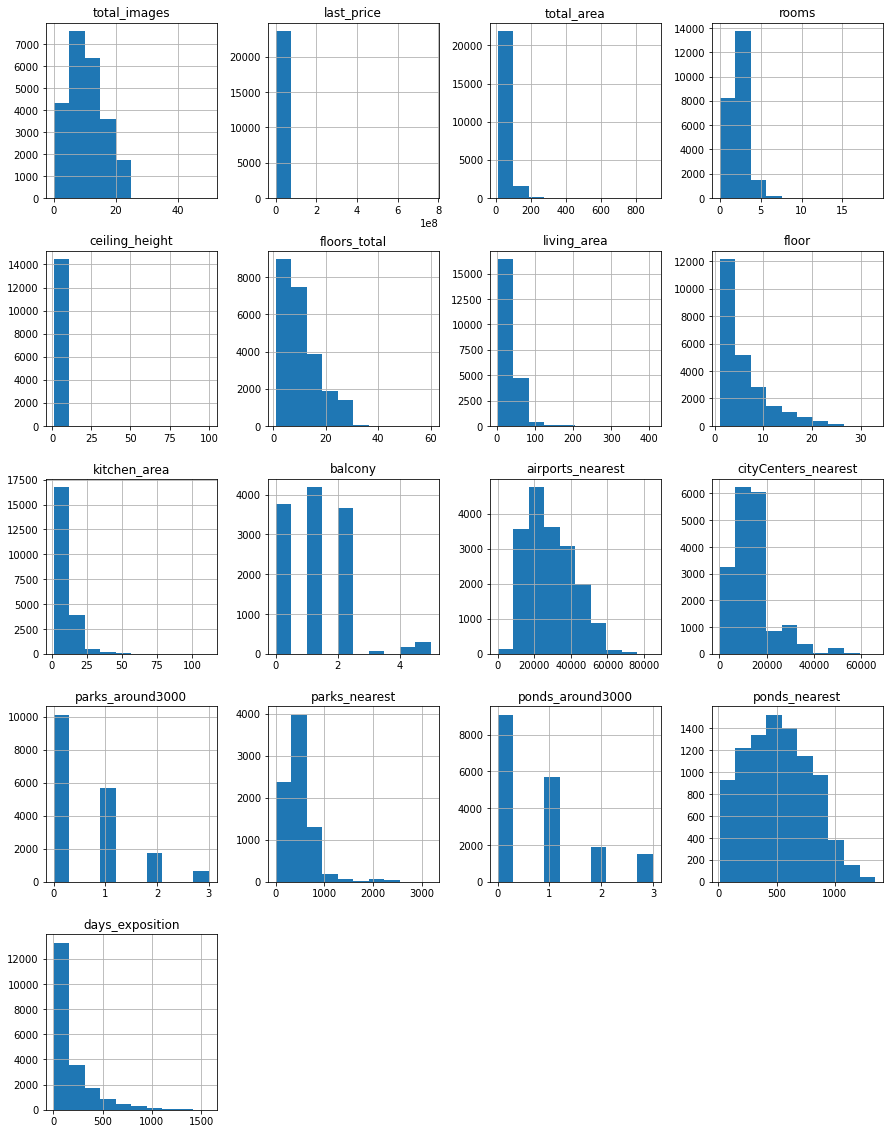

In [3]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [4]:
# переименуем столбец cityCenters_nearest (приведем название к "змеиному регистру")
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
data.info()            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#Определяем в каких столбцах есть пропущенные значения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [27]:
#Можем предположить,что пропуски в данном стоблце обусловлены тем,что это не апартаменты и присвоим пропущенным значениям False
data['is_apartment'] = data['is_apartment'].fillna('False')

#Скорее всего, в данных квартирах нет балконов, поэтому пропущенные значения заменяем на 0
data['balcony'] = data['balcony'].fillna(0)

# Скорее всего,парков в радиусе 3 км нет. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)

# Скорее всего,водоемов в радиусе 3 км нет. Заменяем пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#Данные просто не заполнили, поэтому резонно будет удалить строки с пропущенными значениями
data['locality_name'].dropna(inplace=True)

data.isna().sum()


total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                  86
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                 49
airports_nearest            5538
city_centers_nearest        5517
parks_around3000               0
parks_nearest              15599
ponds_around3000               0
ponds_nearest              14565
days_exposition             3174
sm_price                       0
weekday                        0
month                          0
year                           0
floor_type                     0
city_centers_nearest_km     5517
dtype: int64

In [28]:
# Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)

# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Приводим в целочисленный тип количество балконов
data['balcony'] = data['balcony'].astype(int)

# Приводим в целочисленный тип количество парков. 
data['parks_around3000'] = data['parks_around3000'].astype(int)

# Приводим в целочисленный тип количество прудов.
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

#Изменение типа first_day_exposition необходимо, чтобы работать с датой в дальнейшем было удобно.
#Изменение типов во всех остальных случаях необходимо, чтобы сэкономить память.

In [29]:
#Изучение уникальных значений в столбце с названиями
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посел

In [9]:
#Количество уникальных значений в столбце с названиями до устранения неявных дубликатов
data['locality_name'].unique().shape[0]

365

In [10]:
#Проанализировав все уникальные значения в столбце с названиями, можно предпринять следующие шаги
#для устранения неявных дубликатов:
#1)Привести всё к нижнему регистру.
#2)Заменить все "ё" на "е".
#3)Заменить "городской поселок" на "поселок городского типа"

#Приводим все к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

#Заменяем все "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

#Заменяем "городской поселок" на "поселок городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

#Количество уникальных значений в столбце с названиями после устранения неявных дубликатов
data['locality_name'].unique().shape[0]

324

In [11]:
#ceiling_height - высота потолков.
#Независимо от года постройки и от типа здания, высота от пола до потолка должна быть в пределах 2,5-3,2 метров.
#При изучении недвижимости известны только небольшое количество сверхдорогих двухэтажнх пентхаусов с высотой потолков 4-5м.
#Можно предположить, что квартиры с высотой потолков 25-36м на самом деле являются опечаткой и соотвествуют 2.5-3.6м
#Исходя их этого предполагаем, что все квартиры с высотой потолков от 36м являются выбросами.
#Более того есть одно значение, которое показывает высоту потолков выше 50м.

print('Квартир с потолками от 4 до 5м: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 5 до 25м: ' + str(data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 25м до 36м: ' + str(data.query('ceiling_height >= 25 and ceiling_height <= 36')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 25м до 36м: ' + str(data.query('ceiling_height > 36 and ceiling_height < 50')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 50м: ' + str(data.query('ceiling_height >= 50')['ceiling_height'].count()) + ' шт.')

Квартир с потолками от 4 до 5м: 39 шт.
Квартир с потолками от 5 до 25м: 16 шт.
Квартир с потолками от 25м до 36м: 19 шт.
Квартир с потолками от 25м до 36м: 0 шт.
Квартир с потолками от 50м: 1 шт.


In [12]:
#Для квартир с высотой потолков до 25 до 36 метров предполагаем, что это опечатка и делим на 10, получая 2.5 и 3.6 метра.
#Удаляем квартиры с высотой потолков от 36 метров.
#Заполняем пропуски в столбце медианными значениями
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

data.drop(index=data.query('ceiling_height > 36').index,inplace=True)
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Жилая площадь меньше 10 кв.м.:  25
Жилая площадь больше общей:  0
Жилая площадь больше 200:  31


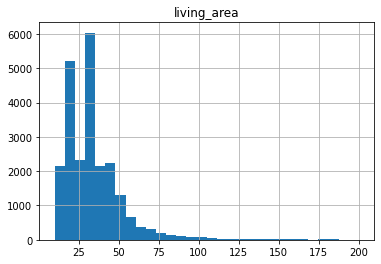

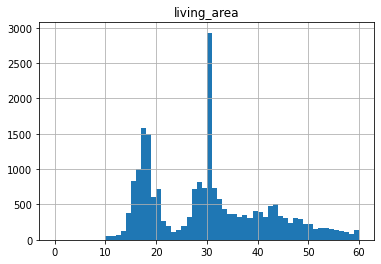

In [13]:
#living_area - Имеем большое количество квартир с жилой площадью от 10 до 60 кв.м.
#Здесь интерсуют квартиры с жилой площадью меньше 10 кв.м. их 25!
#Судя по гистограмме есть даже с с жилой площадью 2 кв.м., скорее всего опечатка в площади.
#Отбросим значения с жилой площадью меньше 10кв.м.
#Отбросим квартиры с площадью более 200 кв.м.
#Заполняем пропуски в столбце медианными значениями

print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше общей: ',data.query('living_area > total_area')['living_area'].count())
print('Жилая площадь больше 200: ',data.query('living_area > 200')['living_area'].count())

data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)
data['living_area'].fillna(data['living_area'].median(), inplace=True)

data.hist('living_area', bins=30);
data.hist('living_area', bins=60, range=(0,60));

In [14]:
#По столбцу kitchen_area - иногда продавцы могут не указывать данное значение, вычисляем данное значение
#Нужно найти соотношение медианной общей площади к медианной площади кухни.
#А затем, заполнить пропуски в столбце kitchen_area отношением общей площади к найденному соотношению.
kitchen_ratio = data['total_area'].median() / data['kitchen_area'].median()
data['kitchen_area'].fillna(data['total_area'] / kitchen_ratio, inplace=True)
data['kitchen_area'].isna().sum()

0

### Посчитаем и добавим в таблицу новые столбцы

In [15]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года

#день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['weekday'] = data['first_day_exposition'].dt.weekday

#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

#расстояние в км до центра города
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

### Исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

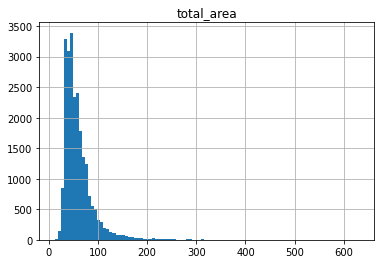

In [16]:
data.hist('total_area', bins=100)

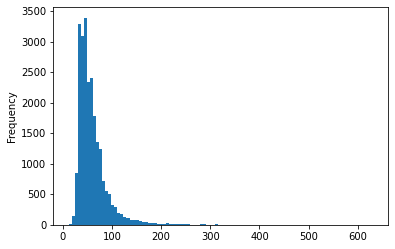

In [17]:
data['total_area'].plot(kind='hist', bins=100);

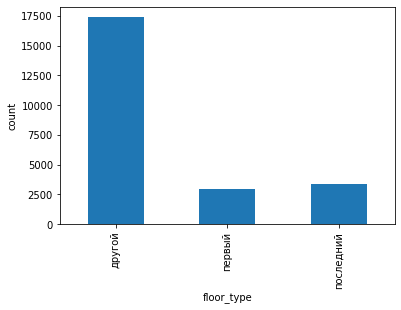

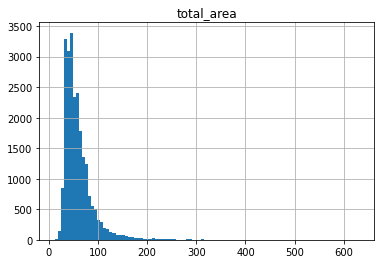

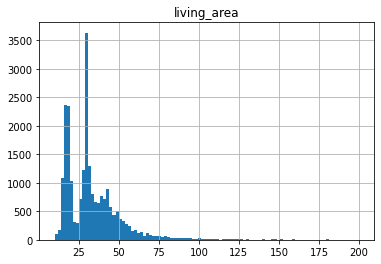

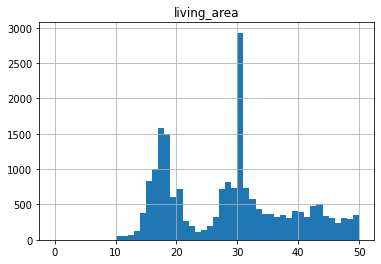

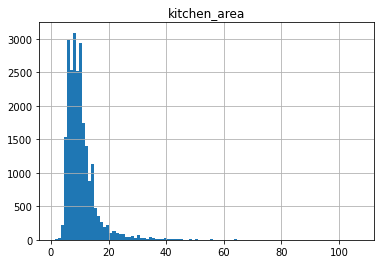

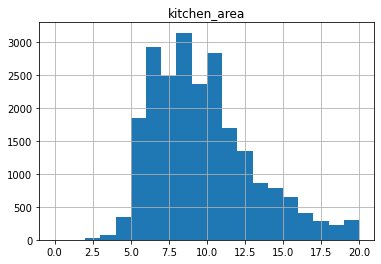

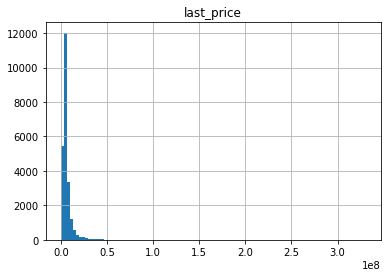

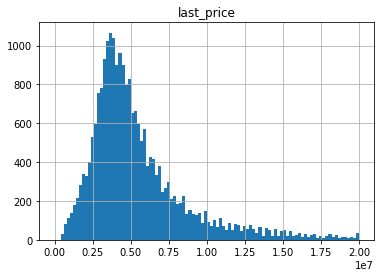

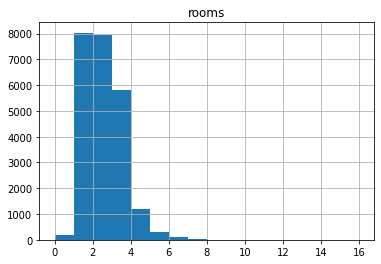

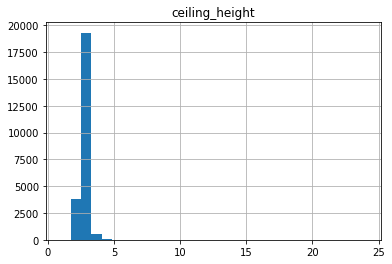

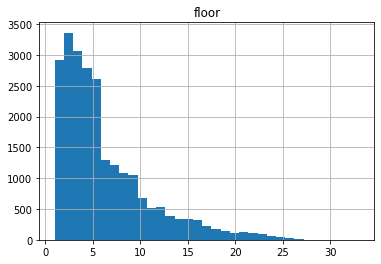

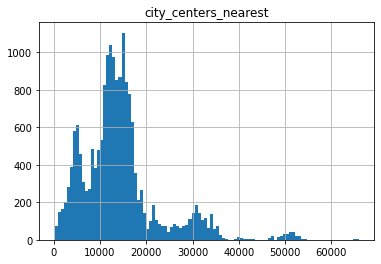

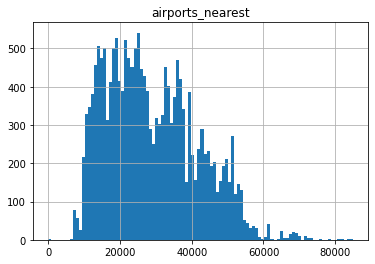

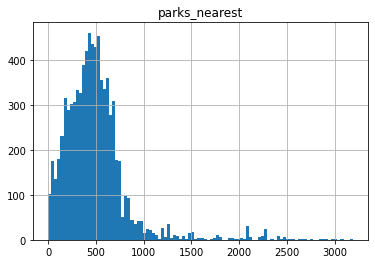

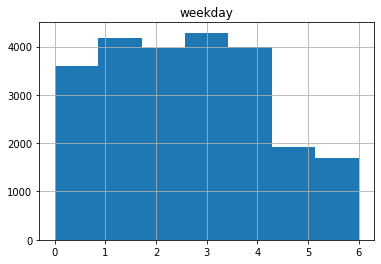

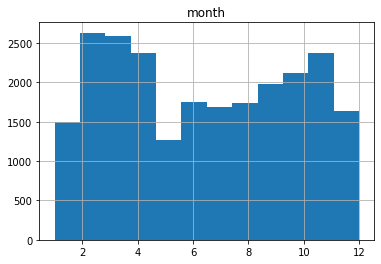

In [18]:
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count');

data.hist('total_area', bins=100);

data.hist('living_area', bins=100);
data.hist('living_area', bins=50, range=(0,50));

data.hist('kitchen_area', bins=100);
data.hist('kitchen_area', bins=20, range=(0,20));

data.hist('last_price', bins=100);
data.hist('last_price', bins=100, range=(0,2e+07));

data.hist('rooms', bins=data['rooms'].max());

data.hist('ceiling_height', bins=30);

data.hist('floor', bins=data['floor'].max());

data.hist('city_centers_nearest', bins=100);

data.hist('airports_nearest', bins=100);

data.hist('parks_nearest', bins=100);

data.hist('weekday', bins=7);

data.hist('month', bins=12);


Приведены гистограммы для:

-тип этажа квартиры («первый», «последний», «другой»);
Больше всего квартир на "другом" этаже и это логично. Первых и последних этажей одинакого мало.

-общая площадь;
Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м. Если построить "ящик с усами" явно будет немного значений которые покажутся выбросами, но это просто элитная недвижимость.

-жилая площадь;
Наблюдаем два пика - на 18 кв.м. и на 30 кв.м. Нужно проверить, почему у нас именно два пика и почему есть явный провал около 24 кв.м.

-площадь кухни;
Площадь кухни выглядит хорошо.

-цена объекта;
Цена объекта выглядит хорошо. Немного "шумный" график. Очень длинный "хвост" вправо - это похоже элитная недвижимость.

-количество комнат;
Больше всего двух- и трёх-комнатных квартир, но встречаются и редкие исключения.

высота потолков;
Здесь два пика 2.5м и 3м, что логично.

-этаж квартиры;
Больше всего квартир с 1 по 5 этаж, что логично

-общее количество этажей в доме;
Видим явные пики: 5-этажная застройка, 9-этажная застройка, и небольшие пики более высоких новостроек.

-расстояние до центра города в метрах;
Здесь наблюдаем два пика, один маленький, 5км и другой побльшой от 10 км. до 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км.

-расстояние до ближайшего аэропорта;
Здесь видим довольно "шумный" график. Но это вполне нормально.

-расстояние до ближайшего парка;
Судя по графику больше всего квартир с парками на расстоянии до 750м.

-день и месяц публикации объявления.
Видим провал в публикации объявлений в субботу и воскресенье, что логично. Так же видим что с февраля по апрель наблюдалосась повышенная активность. Так же был плавный рост активности с июля по ноябрь. Провалы в декабре, январе и мае.

Среднее время продажи квартиры в днях: 180
Медианное время продажи квартиры в днях: 95


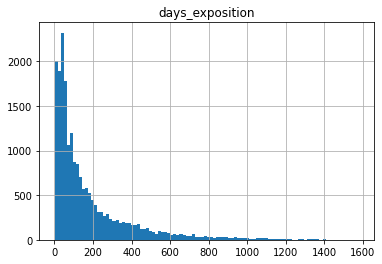

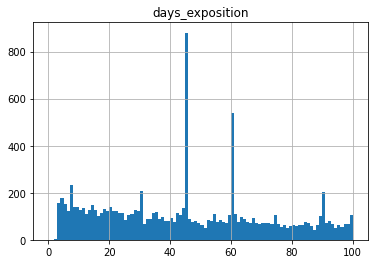

In [19]:
#Как быстро продавались квартиры (столбец days_exposition)
data.hist('days_exposition', bins=100);
data.hist('days_exposition', bins=100, range = (0,100));
print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))


Медианное время продажи - 95 дней. Среднее время продажи - 180 дней.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

In [20]:
#Какие факторы больше всего влияют на общую (полную) стоимость объекта.
list_for_graph = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                 ]

for entry in list_for_graph:
    correlation = data['last_price'].corr(data[entry])
    print(f'Корреляция между last_price и {entry} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 69.34%
Корреляция между last_price и living_area составляет: 54.64%
Корреляция между last_price и kitchen_area составляет: 55.51%
Корреляция между last_price и rooms составляет: 39.53%


<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

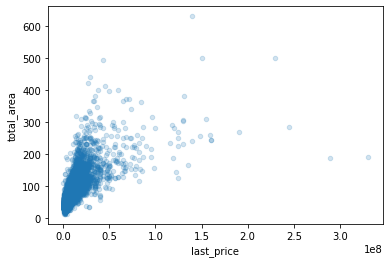

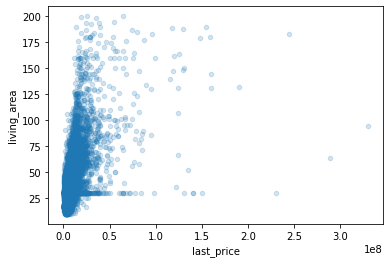

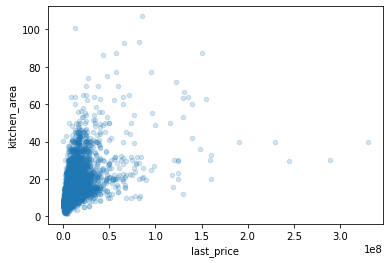

In [21]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)

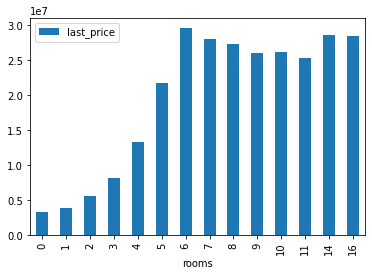

In [22]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

<AxesSubplot:xlabel='last_price', ylabel='floor_type'>

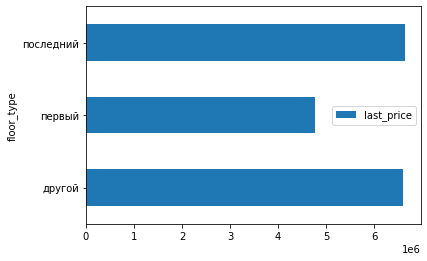

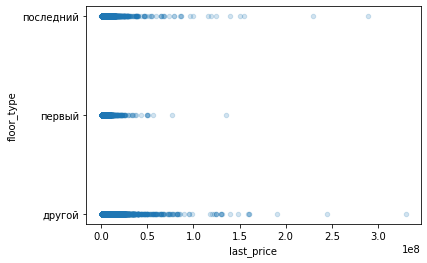

In [23]:
data.pivot_table(index='floor_type',values='last_price').plot(y='last_price', kind='barh');

data.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.2)

Цена по убыванию зависит от:

-общей площади;
-жилой площади;
-площади кухни;
-количества комнат.

Цена практически зависит от:

-этажа, на котором расположена квартира.

<AxesSubplot:ylabel='locality_name'>

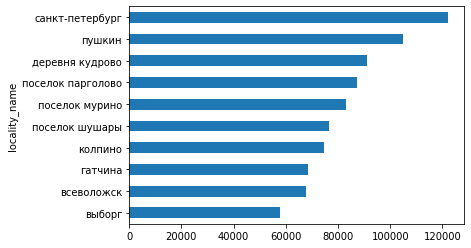

In [24]:
#Cредняя цена одного квадратного метра в топ-10 населенных пунктах
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10['price_per_sq_m'].plot(kind='barh')

In [25]:
data.groupby(by='rooms')['rooms'].count().sort_values(ascending=False)

rooms
1     8032
2     7933
3     5813
4     1176
5      321
0      195
6      102
7       47
8       10
9        6
10       3
11       2
14       1
16       1
Name: rooms, dtype: int64

Ожидаемо самая дорогая недвижимость в Санкт-Петербурге.
В ТОП-10 входят ближайшие к Санкт-Петербургу города.

<AxesSubplot:xlabel='city_centers_nearest_km'>

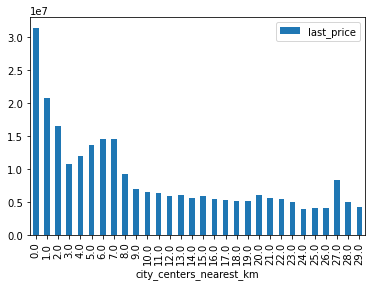

In [26]:
#Как стоимость объектов зависит от расстояния до центра города.
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
)

С большим отрывом лидирует недвижимость до 1км.
Видим более низкие цены на недвижимость на расстоянии от 1 км. до 7 км. включительно.
Далее цена спадает на расстоянии от 8 км. до 27 км.
Видим пик на 27км, его сложно объяснить, возможно это недвижимость в "особом" районе.

### Общий вывод

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

Факторы, влияющие на стоимость:
На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

Стоимость квадратного метра в топ-10 населённых пунктов:
Дороже всего квадратный метр в Санкт-Петербурге,
дешевле всего квадратный метр в Выборге

Факторы, влияющие на стоимость в центре Санкт-Петербурга:
В центре города практически нет разницы, насколько квартира удалена от условного центра города.
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
В центре есть очень дорогие однокомнатные квартиры.